In [2]:
from pennylane import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
load_Train_Data = pd.read_csv('KDDTrain+.txt')
# load_Train_Data['normal'].unique()
load_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [17]:
load_Test_Data=pd.read_csv('KDDTest+.txt')
# load_Test_Data.info()
dataSet=pd.DataFrame(load_Test_Data)
dataSet

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [18]:
# Column names from the original NSL-KDD dataset
column_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell',
    'su_attempted','num_root','num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty'
]

# Load training data
df_train = pd.read_csv("KDDTrain+.txt", names=column_names)
df_test = pd.read_csv("KDDTest+.txt", names=column_names)

print(df_train.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [19]:
# Convert labels to binary
df_train['label'] = df_train['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')
df_test['label'] = df_test['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# One-hot encode categorical features
df_train = pd.get_dummies(df_train, columns=['protocol_type', 'service', 'flag'])
df_test = pd.get_dummies(df_test, columns=['protocol_type', 'service', 'flag'])

# Align columns (in case test is missing some dummies)
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

# Drop 'difficulty' column (not used)
df_train.drop(columns=['difficulty'], inplace=True)
df_test.drop(columns=['difficulty'], inplace=True)


In [20]:
X_train = df_train.drop(columns=['label'])
y_train = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)

X_test = df_test.drop(columns=['label'])
y_test = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)


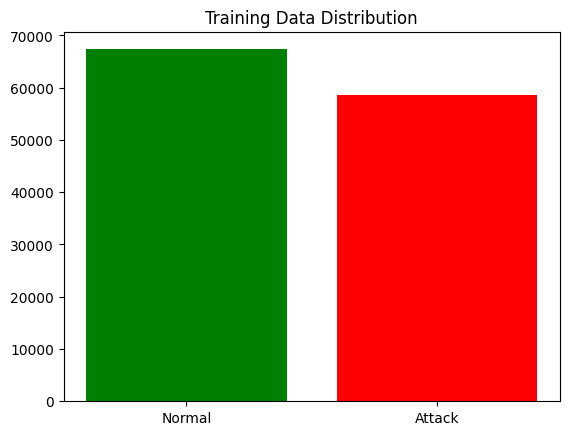

In [11]:
labels = ['Normal', 'Attack']
counts = [y_train.value_counts()[0], y_train.value_counts()[1]]

plt.bar(labels, counts, color=['green', 'red'])
plt.title("Training Data Distribution")
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the dataset (ensure you have KDDTrain+.txt locally)
df = pd.read_csv("KDDTrain+.txt", header=None)

# 2. Add column names (41 features + label)
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"
]


df.columns = columns

# 3. Encode categorical features
for col in ["protocol_type", "service", "flag"]:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Convert label to binary (normal = 0, attack = 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# 5. Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# 9. Evaluate
y_pred = lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[13083   339]
 [  212 11561]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     13422
           1       0.97      0.98      0.98     11773

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     13422
           1       0.96      0.94      0.95     11773

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



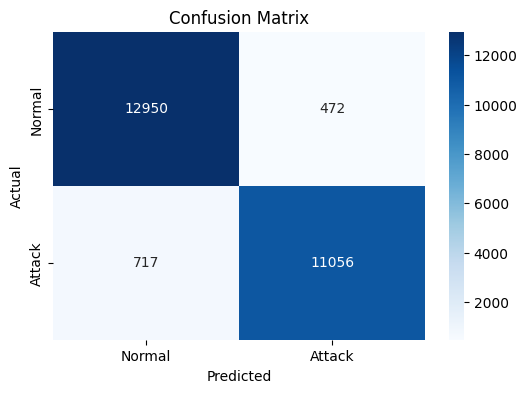

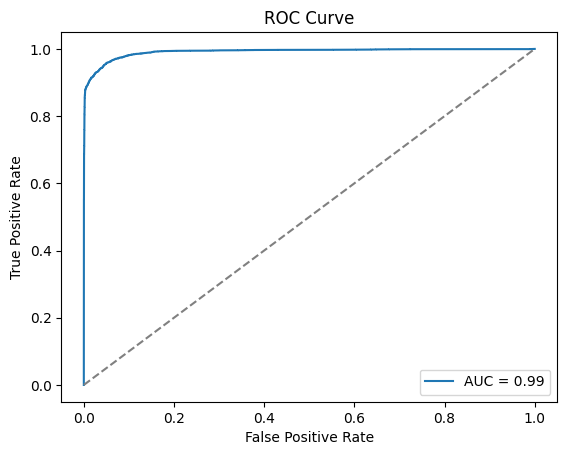

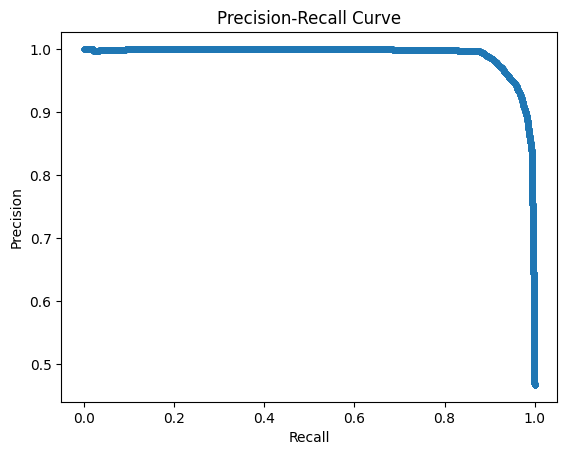

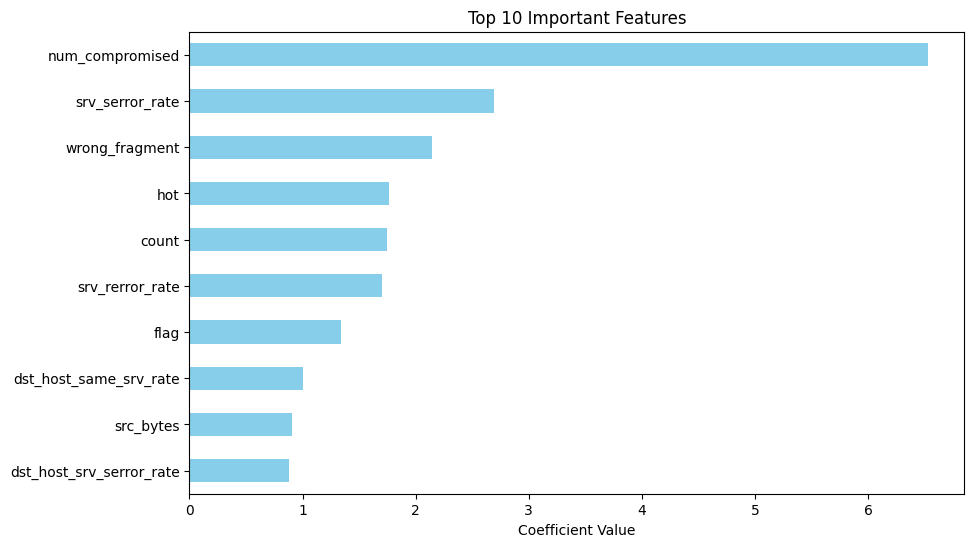

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve,
    auc, precision_recall_curve
)

# 1. Load the dataset
df = pd.read_csv("KDDTrain+.txt", header=None)

# 2. Add column names (41 features + label + difficulty)
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"
]
df.columns = columns

# 3. Drop difficulty column
df = df.drop("difficulty", axis=1)

# 4. Encode categorical features
for col in ["protocol_type", "service", "flag"]:
    df[col] = LabelEncoder().fit_transform(df[col])

# 5. Convert label to binary (normal = 0, attack = 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# 6. Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# 7. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# 10. Predict
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# 11. Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# 12. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 13. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 14. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 15. Feature Importance (Logistic Regression Coefficients)
coef = lr.coef_[0]
feature_names = X.columns
feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()
